# Visualize your results

This notebook creates plots of the results you gathered while running experiments. The results for each evaluation method are stored in a pandas dataframe at 
`<experiment_timestamp>/<evaluation_method>/<evaluation_method>.csv`. The results are grouped by evaluation method, i.e. results for different datasets are stored in the same pandas dataframe of the corresponding evaluation method.

## How to use this notebook

1. Adapt the `result_folder` and `datasets` parameters according to the experiment you want to create a plot for.
2. There are two cells for each evaluation method. At the beginning the dataframe containing the results is loaded and analyzed. All unique embedded methods are printed. 
3. Define names for each embedding method which are displayed in the graph on the x-axis.
4. Run the second cell. The plots are stored under `<experiment_timestamp>/<evaluation_method>`

If you want to change the format of the plots. Simply change the ending of the output path from e.g. `.svg` to `.png`.

In [10]:
import pickle
import sys
import time
import os
sys.path.insert(0, '../')
# visualization
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


# Parameters
datasets = ["cora","hvr","citeseer", "polblogs"]
result_folder = '/nfs/students/winter-term-2019/project_5/ruetting/project-5/experiments/results/2020_01_28_00_07/'

# Link prediction

In [11]:
# Load and anaylze result dataframe
df = pd.read_csv(f'{result_folder}/link_prediction/link_prediction_results.csv')
embedding_methods = df["embedding_method"].unique()
datasets = df["dataset"].unique()
print(embedding_methods)

['Bernoulli_sigmoid_adjacency_64' 'Bernoulli_gaussian_adjacency_64'
 'Bernoulli_exponential_adjacency_64' 'Bernoulli_dist2_adjacency_64'
 'KL_64_softmax_ppr' 'KL_64_softmax_sum_power_tran'
 'KL_64_softmax_transition' 'Matrix_Fatorization_adjacency_64_1'
 'Matrix_Fatorization_laplacian_64_1'
 'Matrix_Fatorization_transition_64_1'
 'Matrix_Fatorization_sym_normalized_laplacian_64_1'
 'Matrix_Fatorization_NetMF_64_1' 'Matrix_Fatorization_ppr_64_1'
 'Matrix_Fatorization_sum_power_tran_64_1']


In [12]:
valid_columns = ['Bernoulli_sigmoid_adjacency_64',
                 'Bernoulli_gaussian_adjacency_64',
 'Bernoulli_exponential_adjacency_64',
'Bernoulli_dist2_adjacency_64',
 'KL_64_softmax_ppr',
'KL_64_softmax_sum_power_tran',
 'KL_64_softmax_transition',
 'Matrix_Fatorization_adjacency_64_1',
 'Matrix_Fatorization_laplacian_64_1',
 'Matrix_Fatorization_transition_64_1',
 'Matrix_Fatorization_sym_normalized_laplacian_64_1',
 'Matrix_Fatorization_NetMF_64_1',
 'Matrix_Fatorization_ppr_64_1',
 'Matrix_Fatorization_sum_power_tran_64_1']
embedding_methods = valid_columns

In [13]:
df = df.loc[df['embedding_method'].isin(valid_columns)]

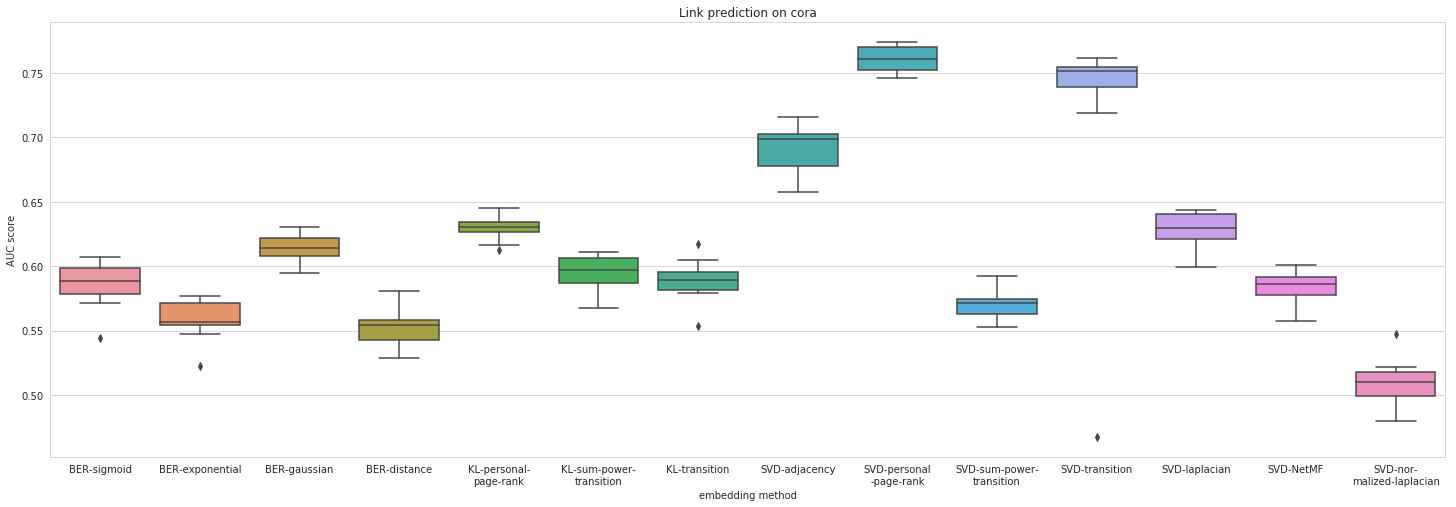

In [14]:
# Define x-axis names and create plots
x_axis_names = ['BER-sigmoid','BER-exponential','BER-gaussian','BER-distance',
            'KL-personal-\npage-rank','KL-sum-power-\ntransition','KL-transition',
            'SVD-adjacency','SVD-personal-\npage-rank', 'SVD-sum-power-\ntransition','SVD-transition', 'SVD-laplacian','SVD-NetMF','SVD-nor-\nmalized-laplacian']

for dataset in datasets:
    plot_data = []
    for emb_method in embedding_methods:
        plot_data.append(df.loc[(df["dataset"] == dataset) & (df["embedding_method"] == emb_method), "auc_score"].values)
    output_path_svg = f'{result_folder}/link_prediction/link_prediction_{dataset}.svg'
    output_path_png = f'{result_folder}/link_prediction/link_prediction_{dataset}.png'
    plt.figure(figsize=(25, 8))
    sns_plot = sns.boxplot(x=x_axis_names, y=plot_data);
    plt.title(f'Link prediction on {dataset}')
    plt.xlabel("embedding method")
    plt.ylabel("AUC score")
    plt.show()
    sns_plot.figure.savefig(output_path_svg)
    sns_plot.figure.savefig(output_path_png)

# Node classification

In [15]:
# Load and anaylze result dataframe
df = pd.read_csv(f'{result_folder}/node_classification/node_classification_results.csv')
embedding_methods = df["embedding_method"].unique()
datasets = df["dataset"].unique()
print(embedding_methods)

['Bernoulli_sigmoid_adjacency_64' 'Bernoulli_gaussian_adjacency_64'
 'Bernoulli_exponential_adjacency_64' 'Bernoulli_dist2_adjacency_64'
 'KL_64_softmax_ppr' 'KL_64_softmax_sum_power_tran'
 'KL_64_softmax_transition' 'Matrix_Fatorization_adjacency_64_1'
 'Matrix_Fatorization_laplacian_64_1'
 'Matrix_Fatorization_transition_64_1'
 'Matrix_Fatorization_sym_normalized_laplacian_64_1'
 'Matrix_Fatorization_NetMF_64_1' 'Matrix_Fatorization_ppr_64_1'
 'Matrix_Fatorization_sum_power_tran_64_1']


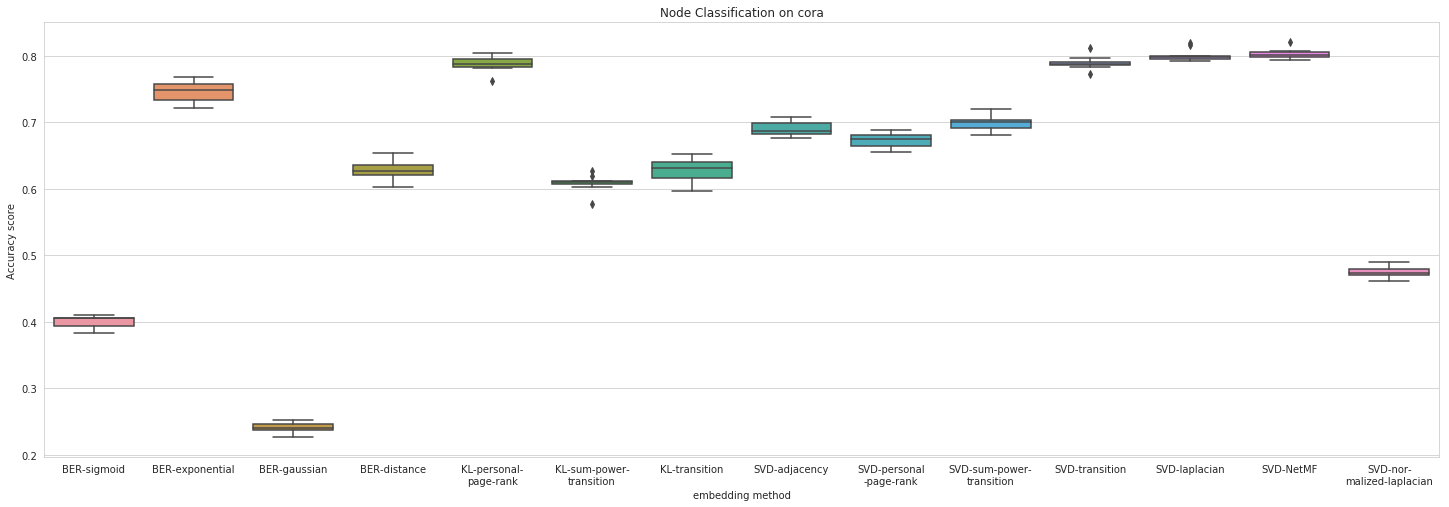

In [16]:
# Define x-axis names and create plots
x_axis_names = ['BER-sigmoid','BER-exponential','BER-gaussian','BER-distance',
            'KL-personal-\npage-rank','KL-sum-power-\ntransition','KL-transition',
            'SVD-adjacency','SVD-personal\n-page-rank', 'SVD-sum-power-\ntransition','SVD-transition', 'SVD-laplacian','SVD-NetMF','SVD-nor-\nmalized-laplacian']

for dataset in datasets:
    plot_data = []
    for emb_method in embedding_methods:
        plot_data.append(df.loc[(df["dataset"] == dataset) & (df["embedding_method"] == emb_method), "acc_score"].values)
    output_path_svg = f'{result_folder}/node_classification/node_classification_{dataset}.svg'
    output_path_png = f'{result_folder}/node_classification/node_classification_{dataset}.png'
    plt.figure(figsize=(25, 8))
    sns_plot = sns.boxplot(x=x_axis_names, y=plot_data);
    plt.title(f'Node Classification on {dataset}')
    plt.xlabel("embedding method")
    plt.ylabel("Accuracy score")
    plt.show()
    sns_plot.figure.savefig(output_path_svg)
    sns_plot.figure.savefig(output_path_png)

# Node clustering

In [17]:
# Load and anaylze result dataframe
df = pd.read_csv(f'{result_folder}/node_clustering/node_clustering_results.csv')
embedding_methods = df["embedding_method"].unique()
datasets = df["dataset"].unique()
print(embedding_methods)

['Bernoulli_sigmoid_adjacency_64' 'Bernoulli_gaussian_adjacency_64'
 'Bernoulli_exponential_adjacency_64' 'Bernoulli_dist2_adjacency_64'
 'KL_64_softmax_ppr' 'KL_64_softmax_sum_power_tran'
 'KL_64_softmax_transition' 'Matrix_Fatorization_adjacency_64_1'
 'Matrix_Fatorization_laplacian_64_1'
 'Matrix_Fatorization_transition_64_1'
 'Matrix_Fatorization_sym_normalized_laplacian_64_1'
 'Matrix_Fatorization_NetMF_64_1' 'Matrix_Fatorization_ppr_64_1'
 'Matrix_Fatorization_sum_power_tran_64_1']


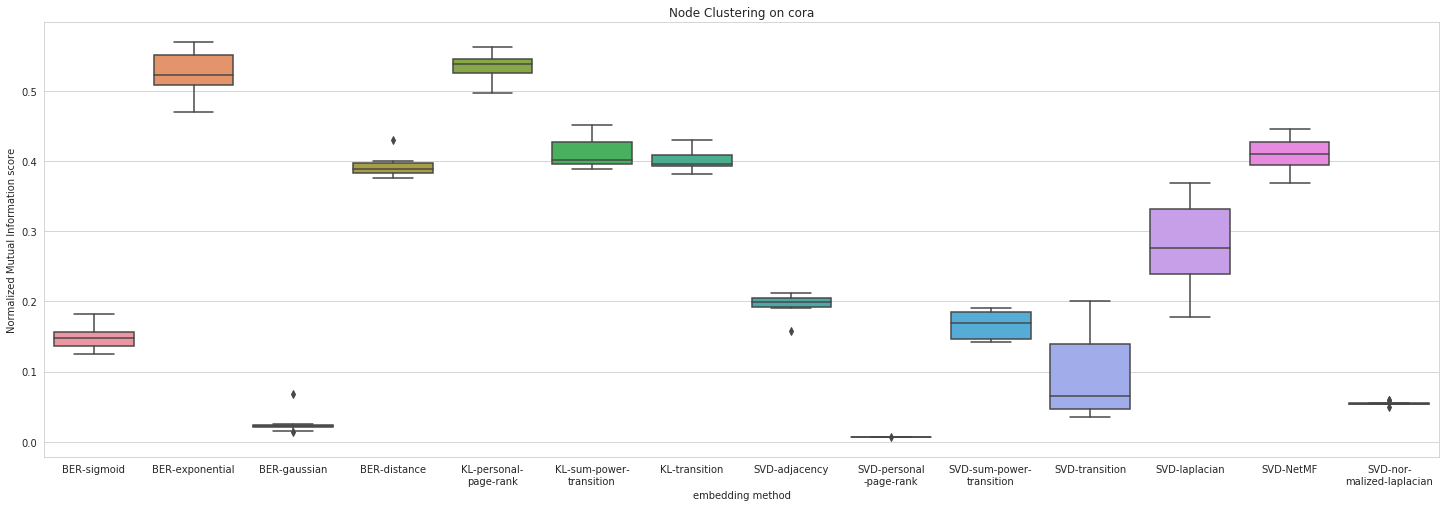

In [18]:
# Define x-axis names and create plots
x_axis_names = ['BER-sigmoid','BER-exponential','BER-gaussian','BER-distance',
            'KL-personal-\npage-rank','KL-sum-power-\ntransition','KL-transition',
            'SVD-adjacency','SVD-personal\n-page-rank', 'SVD-sum-power-\ntransition','SVD-transition', 'SVD-laplacian','SVD-NetMF','SVD-nor-\nmalized-laplacian']

for dataset in datasets:
    plot_data = []
    for emb_method in embedding_methods:
        plot_data.append(df.loc[(df["dataset"] == dataset) & (df["embedding_method"] == emb_method), "nmi_score"].values)
    output_path_svg = f'{result_folder}/node_clustering/node_clustering_{dataset}.svg'
    output_path_png = f'{result_folder}/node_clustering/node_clustering_{dataset}.png'
    plt.figure(figsize=(25, 8))
    sns_plot = sns.boxplot(x=x_axis_names, y=plot_data);
    plt.title(f'Node Clustering on {dataset}')
    plt.xlabel("embedding method")
    plt.ylabel("Normalized Mutual Information score")
    plt.show()
    sns_plot.figure.savefig(output_path_svg)
    sns_plot.figure.savefig(output_path_png)